# E-commerce womens' clothing recommendation

In [62]:
#import the basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Reading the dataset

In [63]:
df=pd.read_csv('ecommerce_womens_clothing.csv')
df.head()

,Sl_No,Clothing_ID,Age,Title,Review_Text,Rating,Recommend,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,0,767,33.0,NaN,Absolutely wonderful - silky and sexy and comf...,4.0,1,0,Initmates,Intimate,Intimates
1,1,1080,34.0,NaN,Love this dress! it's sooo pretty. i happene...,5.0,1,4,General,Dresses,Dresses
2,2,1077,60.0,Some major design flaws,I had such high hopes for this dress and reall...,3.0,0,0,General,Dresses,Dresses
3,3,1049,50.0,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,1,0,General Petite,Bottoms,Pants
4,4,847,47.0,Flattering shirt,This shirt is very flattering to all due to th...,5.0,1,6,General,Tops,Blouses


#### Determining dimensions of dataset

In [64]:
df.shape

(23486, 11)

The dataset consists of 23486 rows and 11 columns

#### Concise summary of the dataset including columns, datatypes and null counts

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sl_No                    23486 non-null  int64  
 1   Clothing_ID              23486 non-null  int64  
 2   Age                      23480 non-null  float64
 3   Title                    19676 non-null  object 
 4   Review_Text              22641 non-null  object 
 5   Rating                   23479 non-null  float64
 6   Recommend                23486 non-null  int64  
 7   Positive_Feedback_Count  23486 non-null  int64  
 8   Division_Name            23472 non-null  object 
 9   Department_Name          23472 non-null  object 
 10  Class_Name               23472 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 2.0+ MB


### Pre-processing

#### Missing values handling

In [66]:
#missing values check for each column
df.isna().sum()

Sl_No                         0
Clothing_ID                   0
Age                           6
Title                      3810
Review_Text                 845
Rating                        7
Recommend                     0
Positive_Feedback_Count       0
Division_Name                14
Department_Name              14
Class_Name                   14
dtype: int64

Age and Rating are numerical columns with missing values, remaining missing values are for categorical columns

Text(0.5, 1.0, 'Distribution plot for Age')

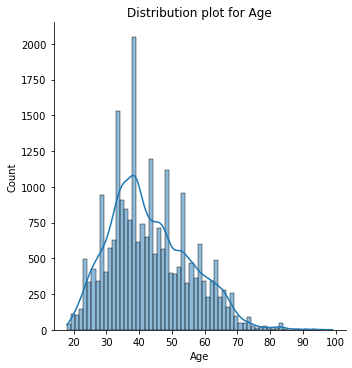

In [67]:
#checking age distribution
sns.displot(data=df, x='Age', kde=True)
plt.title("Distribution plot for Age",fontsize=12)

As per above plot age is slighlty right skewed therefore, missing values can be filled with median of age

In [68]:
df.fillna({'Age':df['Age'].median()},inplace=True)
df.isna().sum()

Sl_No                         0
Clothing_ID                   0
Age                           0
Title                      3810
Review_Text                 845
Rating                        7
Recommend                     0
Positive_Feedback_Count       0
Division_Name                14
Department_Name              14
Class_Name                   14
dtype: int64

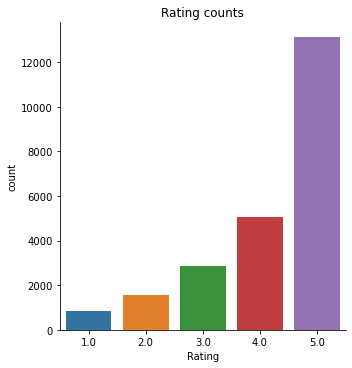

In [69]:
#checking rating distribution
sns.catplot(x='Rating', kind="count", data=df).set(title='Rating counts')

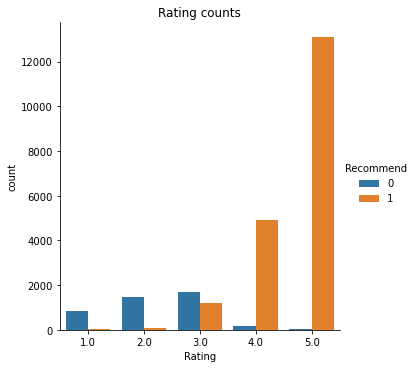

In [70]:
#checking ratings based on recommendation
sns.catplot(x='Rating', kind="count", hue='Recommend',data=df).set(title='Rating counts')

In [71]:
df.groupby(['Recommend','Rating']).size()

Recommend  Rating
0          1.0         826
           2.0        1471
           3.0        1681
           4.0         167
           5.0          25
1          1.0          16
           2.0          94
           3.0        1189
           4.0        4907
           5.0       13103
dtype: int64

As per the above plot and data rating has highest frequency for 5 in recommended category(1) and 3 in not recommended category(0)

In [72]:
#filling missing rating values based on mode(5,3) of corresponding recommend column value(1/0)
df.loc[df['Recommend']==0, 'Rating'] = df.loc[df['Recommend']==0, 'Rating'].fillna(3)
df.loc[df['Recommend']==1, 'Rating'] = df.loc[df['Recommend']==1, 'Rating'].fillna(5)

In [73]:
df.isna().sum()

Sl_No                         0
Clothing_ID                   0
Age                           0
Title                      3810
Review_Text                 845
Rating                        0
Recommend                     0
Positive_Feedback_Count       0
Division_Name                14
Department_Name              14
Class_Name                   14
dtype: int64

In [74]:
df[['Title','Review_Text','Rating']].tail(10)

,Title,Review_Text,Rating
23476,Cheeky!,These bottoms are very cute but defiantly chee...,4.0
23477,Entrancing,I'm so impressed with the beautiful color comb...,4.0
23478,Unflattering,I was surprised at the positive reviews for th...,1.0
23479,What a fun piece!,So i wasn't sure about ordering this skirt bec...,5.0
23480,NaN,NaN,5.0
23481,Great dress for many occasions,I was very happy to snag this dress at such a ...,5.0
23482,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3.0
23483,"Cute, but see through","This fit well, but the top was very see throug...",3.0
23484,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3.0
23485,Please make more like this one!,This dress in a lovely platinum is feminine an...,5.0


Title and Review_Text are descriptions conveying like or dislike for the product which is essentially captured in Rating. Therefore to avoid redundancy, columns Title and Review_Text can be dropped.

In [75]:
df.drop(axis=1,columns=['Title','Review_Text'],inplace=True)
df.isna().sum()

Sl_No                       0
Clothing_ID                 0
Age                         0
Rating                      0
Recommend                   0
Positive_Feedback_Count     0
Division_Name              14
Department_Name            14
Class_Name                 14
dtype: int64

In [76]:
df.loc[((df['Division_Name'].isna()) | (df['Department_Name'].isna()) | (df['Class_Name'].isna()))]

,Sl_No,Clothing_ID,Age,Rating,Recommend,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
9444,9444,72,25.0,5.0,1,0,NaN,NaN,NaN
13767,13767,492,23.0,5.0,1,1,NaN,NaN,NaN
13768,13768,492,49.0,5.0,1,0,NaN,NaN,NaN
13787,13787,492,48.0,5.0,1,0,NaN,NaN,NaN
16216,16216,152,36.0,5.0,1,0,NaN,NaN,NaN
16221,16221,152,37.0,5.0,1,0,NaN,NaN,NaN
16223,16223,152,39.0,5.0,1,0,NaN,NaN,NaN
18626,18626,184,34.0,5.0,1,5,NaN,NaN,NaN
18671,18671,184,54.0,5.0,1,0,NaN,NaN,NaN
20088,20088,772,50.0,5.0,1,0,NaN,NaN,NaN


The 14 missing values for Division_Name, Department_Name and Class_Name are in same rows.

In [77]:
#percentage of dataset with all 3 columns Division_Name, Department_Name and Class_Name having null values
((df['Class_Name'].isna().sum())/df.shape[0])*100 

0.059609980413863575

As only 0.059% of data is having 3 null values in rows we can drop the corresponding rows

In [78]:
#remving the rows with 3 NaN values
df.drop(df[(df['Division_Name'].isna()) & (df['Department_Name'].isna()) & (df['Class_Name'].isna())].index, inplace=True)
df.isna().sum()

Sl_No                      0
Clothing_ID                0
Age                        0
Rating                     0
Recommend                  0
Positive_Feedback_Count    0
Division_Name              0
Department_Name            0
Class_Name                 0
dtype: int64

#### Outlier detection and handling

In [79]:
df.describe()

,Sl_No,Clothing_ID,Age,Rating,Recommend,Positive_Feedback_Count
count,23472.000000,23472.000000,23472.000000,23472.000000,23472.000000,23472.000000
mean,11738.965491,918.486665,43.200494,4.195595,0.822256,2.537151
std,6779.729976,202.727678,12.280016,1.110238,0.382305,5.703597
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5867.750000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11736.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17610.250000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


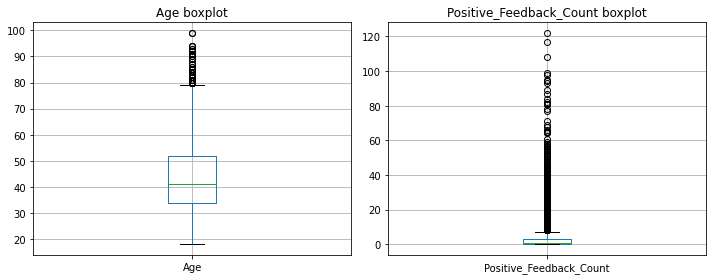

In [80]:
# As data range of values are wide for Age and Positive_Feedback_Count columns we can do outlier check using boxplots
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
df.boxplot(column='Age')
plt.title('Age boxplot',fontsize=12)
plt.subplot(1,2,2)
df.boxplot(column='Positive_Feedback_Count')
plt.title('Positive_Feedback_Count boxplot',fontsize=12)
plt.tight_layout()

The above boxplots confirm presence of high outliers

In [81]:
# Outlier handling based on interquartile range rule of clipping the outliers based on upper and lower limits
outliers_list=['Age','Positive_Feedback_Count']
for i in outliers_list:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    l_lim=Q1-1.5*IQR
    u_lim=Q3+1.5*IQR
    df[i].where(df[i] >=l_lim,l_lim, inplace=True)  #clipping all lower outliers with lower limit
    df[i].where(df[i] <=u_lim,u_lim, inplace=True)  #clipping all upper outliers with upper-limit

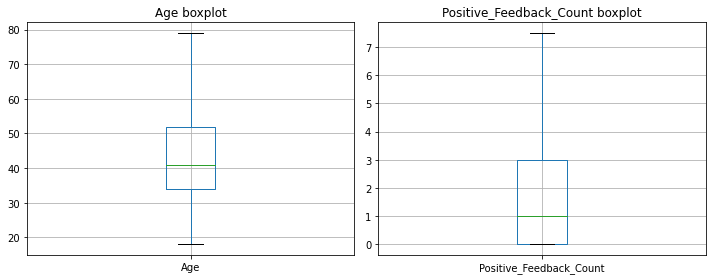

In [82]:
#rechecking for outliers
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
df.boxplot(column='Age')
plt.title('Age boxplot',fontsize=12)
plt.subplot(1,2,2)
df.boxplot(column='Positive_Feedback_Count')
plt.title('Positive_Feedback_Count boxplot',fontsize=12)
plt.tight_layout()

As per the above boxplots the outliers are no longer present

#### Feature engineering

In [83]:
print(df['Age'].describe())
print("No. of unique elements: ",df['Age'].nunique())
print("Unique elements: ",df['Age'].unique())

count    23472.000000
mean        43.174889
std         12.196290
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         79.000000
Name: Age, dtype: float64
No. of unique elements:  62
Unique elements:  [33. 34. 60. 50. 47. 49. 39. 24. 53. 44. 41. 32. 55. 31. 28. 46. 21. 36.
 65. 29. 38. 59. 40. 23. 67. 48. 43. 52. 56. 66. 61. 57. 58. 37. 27. 62.
 68. 51. 79. 69. 54. 63. 71. 30. 35. 64. 42. 22. 26. 72. 25. 45. 74. 70.
 20. 77. 73. 78. 19. 76. 75. 18.]


As per the above data, Age is a numerical column with 62 unique values varying from 18 to 79. To make Age more meaningful for further processing, it can be grouped into ranges that correspond to particular age group

In [84]:
# Ages ranging from 18-25 is considered as category Youngster, 26-40 - Adult, 41-64 - Middle Age,65-80 - Elderly
df['Age']=pd.cut(df['Age'],bins=[18,25,40,64,80],labels=['Youngster','Adult','Middle Age','Elderly'])
df['Age'] = df['Age'].astype('object') #converting from type category to object

In [85]:
#checking Age column after feature engineering
print(df['Age'].describe(),'\n')
print(df['Age'].value_counts())

count          23468
unique             4
top       Middle Age
freq           10847
Name: Age, dtype: object 

Middle Age    10847
Adult         10018
Elderly        1386
Youngster      1217
Name: Age, dtype: int64


#### Feature reduction

In [86]:
df.columns

Index(['Sl_No', 'Clothing_ID', 'Age', 'Rating', 'Recommend',
       'Positive_Feedback_Count', 'Division_Name', 'Department_Name',
       'Class_Name'],
      dtype='object')

Since Sl_No and Clothing_ID are irrelevant for further data processing these columns can be dropped from the dataset

In [87]:
df.drop(axis=1,columns=['Sl_No','Clothing_ID'],inplace=True)

In [88]:
df1=df.copy()

#### Encoding

In [89]:
# finding categorical variables and their unique values for encoding
df_obj=[f for f in df.columns if df[f].dtypes=='O']
for d in df_obj:
    print(d,df[d].unique())

Age ['Adult' 'Middle Age' 'Youngster' 'Elderly' nan]
Division_Name ['Initmates' 'General' 'General Petite']
Department_Name ['Intimate' 'Dresses' 'Bottoms' 'Tops' 'Jackets' 'Trend']
Class_Name ['Intimates' 'Dresses' 'Pants' 'Blouses' 'Knits' 'Outerwear' 'Lounge'
 'Sweaters' 'Skirts' 'Fine gauge' 'Sleep' 'Jackets' 'Swim' 'Trend' 'Jeans'
 'Legwear' 'Shorts' 'Layering' 'Casual bottoms' 'Chemises']


In [90]:
#label encoding for Class_Name
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Class_Name']=le.fit_transform(df['Class_Name'])

In [91]:
#One Hot Encoding for remaining categorical columns Age, Division_Name, Department_Name
df=pd.get_dummies(df,drop_first=True)
pd.pandas.set_option('display.max_columns',None)
df.head()

,Rating,Recommend,Positive_Feedback_Count,Class_Name,Age_Elderly,Age_Middle Age,Age_Youngster,Division_Name_General Petite,Division_Name_Initmates,Department_Name_Dresses,Department_Name_Intimate,Department_Name_Jackets,Department_Name_Tops,Department_Name_Trend
0,4.0,1,0.0,5,0,0,0,0,1,0,1,0,0,0
1,5.0,1,4.0,3,0,0,0,0,0,1,0,0,0,0
2,3.0,0,0.0,3,0,1,0,0,0,1,0,0,0,0
3,5.0,1,0.0,13,0,1,0,1,0,0,0,0,0,0
4,5.0,1,6.0,0,0,1,0,0,0,0,0,0,1,0


#### Normalization/Standardization

In [92]:
# basic column statistics before normalization
df[['Rating','Positive_Feedback_Count','Class_Name']].describe()

,Rating,Positive_Feedback_Count,Class_Name
count,23472.000000,23472.000000,23472.000000
mean,4.195595,1.774220,6.934688
std,1.110238,2.454218,5.209500
min,1.000000,0.000000,0.000000
25%,4.000000,0.000000,3.000000
50%,5.000000,1.000000,7.000000
75%,5.000000,3.000000,10.000000
max,5.000000,7.500000,19.000000


In [93]:
from sklearn.preprocessing import MinMaxScaler
mm_scale=MinMaxScaler(feature_range=(0,1))
df_std=mm_scale.fit_transform(df)
df=pd.DataFrame(df_std,columns = df.columns)
# basic column statistics after normalization
df[['Rating','Positive_Feedback_Count','Class_Name']].describe()

,Rating,Positive_Feedback_Count,Class_Name
count,23472.000000,23472.000000,23472.000000
mean,0.798899,0.236563,0.364984
std,0.277560,0.327229,0.274184
min,0.000000,0.000000,0.000000
25%,0.750000,0.000000,0.157895
50%,1.000000,0.133333,0.368421
75%,1.000000,0.400000,0.526316
max,1.000000,1.000000,1.000000


In [94]:
from sklearn.preprocessing import MinMaxScaler
mm_scale=MinMaxScaler(feature_range=(0,1))
df_std=mm_scale.fit_transform(df)
df=pd.DataFrame(df_std,columns = df.columns)
df[['Rating','Positive_Feedback_Count','Class_Name']].describe()

,Rating,Positive_Feedback_Count,Class_Name
count,23472.000000,23472.000000,23472.000000
mean,0.798899,0.236563,0.364984
std,0.277560,0.327229,0.274184
min,0.000000,0.000000,0.000000
25%,0.750000,0.000000,0.157895
50%,1.000000,0.133333,0.368421
75%,1.000000,0.400000,0.526316
max,1.000000,1.000000,1.000000


#### Checking correlation between features

<AxesSubplot:>

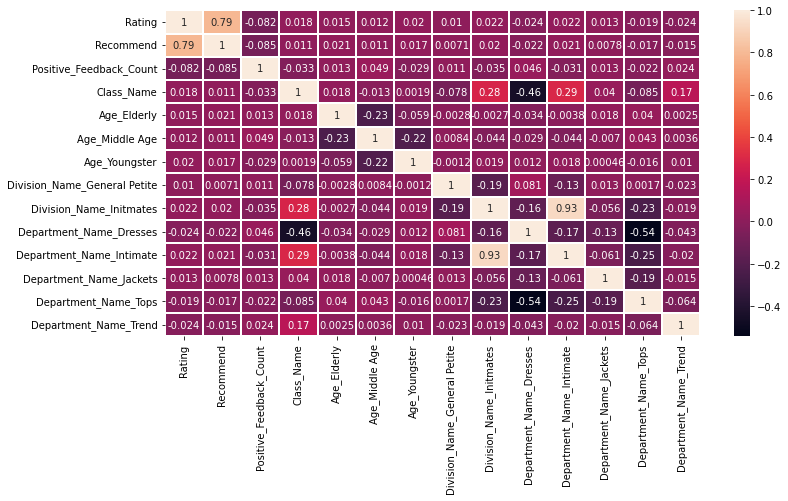

In [95]:
plt.figure(figsize=(12,6))
sns.heatmap(data=df.corr(),annot=True,linewidth=0.2)

Based on the above heatmap columns 'Department_Name_Intimate' and 'Division_Name_Intimates' have high positive correlation of 0.93, therefore we can drop one of the 2 columns

In [96]:
df.drop(axis=1,columns=['Division_Name_Initmates'],inplace=True)
df.columns

Index(['Rating', 'Recommend', 'Positive_Feedback_Count', 'Class_Name',
       'Age_Elderly', 'Age_Middle Age', 'Age_Youngster',
       'Division_Name_General Petite', 'Department_Name_Dresses',
       'Department_Name_Intimate', 'Department_Name_Jackets',
       'Department_Name_Tops', 'Department_Name_Trend'],
      dtype='object')

### Exploratory Data Analysis (Univariate and Bivariate)

In [97]:
df1.columns

Index(['Age', 'Rating', 'Recommend', 'Positive_Feedback_Count',
       'Division_Name', 'Department_Name', 'Class_Name'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of Recommend status')

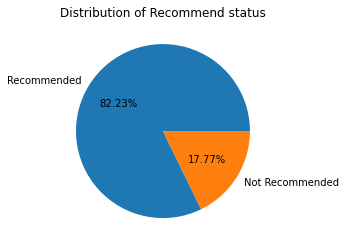

In [98]:
df1.loc[df1['Recommend']==0,'Recommend']='Not Recommended'
df1.loc[df1['Recommend']==1,'Recommend']='Recommended'
plt.figure(figsize=(6,4))
plt.pie(x=df1['Recommend'].value_counts(),labels=('Recommended','Not Recommended'), autopct="%.2f%%")
plt.title('Distribution of Recommend status',fontsize=12)

There is a higher rate of recommendation at 82% in the dataset

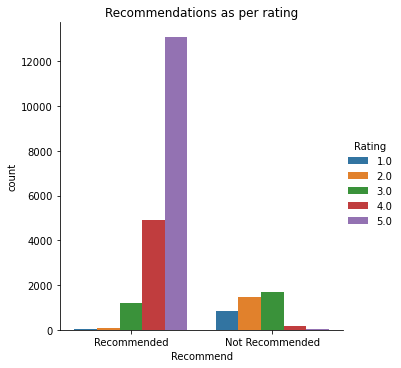

In [99]:
sns.catplot(x='Recommend', kind="count", hue='Rating',data=df1).set(title='Recommendations as per rating')

The recommendation(Recommend=1) is significant for rating 5,4 and 3 only where as non-recommendation(Recommend=0) is significant for ratings 1,2 and 3 only

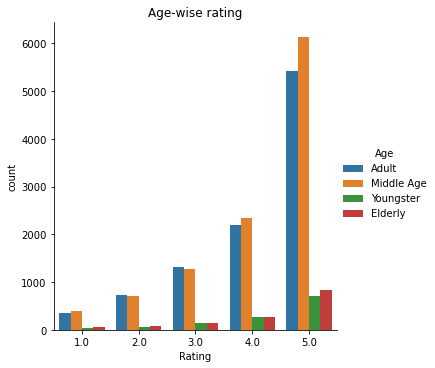

In [100]:
sns.catplot(x='Rating', kind="count", hue='Age',data=df1).set(title='Age-wise rating')

Adult and Middle Age group are significantly active across all ratings probably because they are the working age group and have more liberty of spending when compared to Youngsters and Elderly

          Age  Positive_Feedback_Count
0       Adult                    10018
1     Elderly                     1386
2  Middle Age                    10847
3   Youngster                     1217


[Text(0.5, 1.0, 'Age-wise Positive feedback count')]

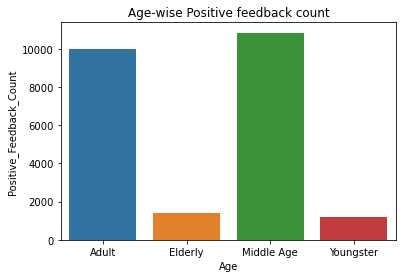

In [101]:
df_fb=df1.groupby('Age')['Positive_Feedback_Count'].size().reset_index()
print(df_fb)
sns.barplot(x="Age", y="Positive_Feedback_Count", data=df_fb).set(title='Age-wise Positive feedback count')

Positive feedback count among Adult and Middle Age is significantly higher as per the above plot

   Rating  Positive_Feedback_Count
0     1.0                      842
1     2.0                     1565
2     3.0                     2872
3     4.0                     5074
4     5.0                    13119


[Text(0.5, 1.0, 'Rating-wise Positive feedback count')]

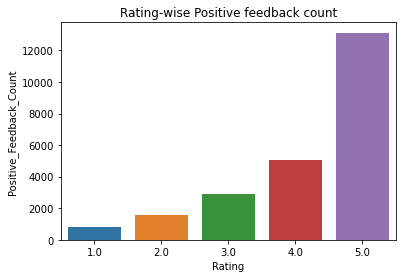

In [102]:
df_fb=df1.groupby('Rating')['Positive_Feedback_Count'].size().reset_index()
print(df_fb)
sns.barplot(x="Rating", y="Positive_Feedback_Count", data=df_fb).set(title='Rating-wise Positive feedback count')

The above plot confirms the fact that higher the ratings greater will be the positive feedbacks

Text(0.5, 1.0, 'Age-category pie plot')

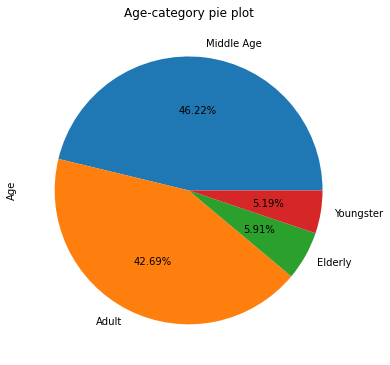

In [103]:
df1.Age.value_counts().plot.pie(figsize=(6, 10),autopct='%1.2f%%')
plt.title('Age-category pie plot')

The above pie-chart gives an idea of the ditribution of age groups within the dataset. The middle age group constitutes a whopping 46% followed by adults at 43% and Youngsters and eldery together constitutes the remaining 11%

Text(0.5, 1.0, 'Division-wise pie plot')

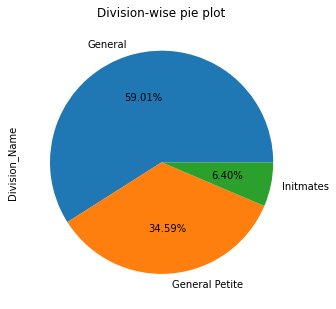

In [104]:
df1.Division_Name.value_counts().plot.pie(figsize=(5, 10),autopct='%1.2f%%')
plt.title('Division-wise pie plot')

General division is the most popular division at 59%

Text(0.5, 1.0, 'Department-wise pie plot')

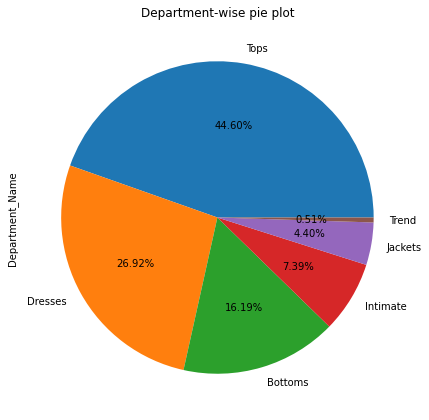

In [105]:
df1.Department_Name.value_counts().plot.pie(figsize=(7, 10),autopct='%1.2f%%')
plt.title('Department-wise pie plot')

As per the above pie plot tops are the most purchased item across department at 44.6% and trend items at 0.51% are the least purchased

Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: Class_Name, dtype: int64


Text(0.5, 1.0, 'Top 10 Class-wise contribution')

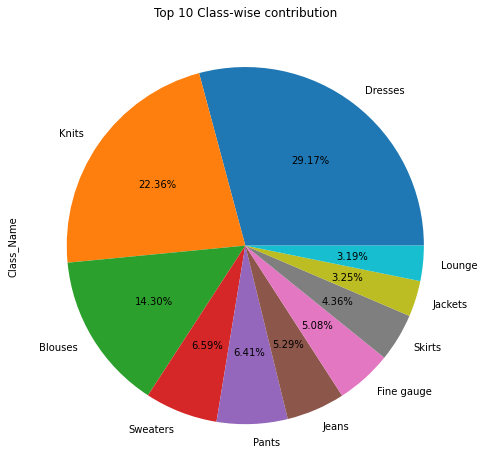

In [106]:
df_class=df1.Class_Name.value_counts()
print(df_class)
df_class[:10].plot.pie(figsize=(8, 10),autopct='%1.2f%%')
plt.title('Top 10 Class-wise contribution')

Dresses are the most popular item at 29% across all classes. The above pie-chart shows the 10 most popular items across the classes

     Division_Name Department_Name  Count
0          General         Bottoms   2542
1          General         Dresses   3730
2          General         Jackets    645
3          General            Tops   6837
4          General           Trend     96
5   General Petite         Bottoms   1257
6   General Petite         Dresses   2589
7   General Petite        Intimate    233
8   General Petite         Jackets    387
9   General Petite            Tops   3631
10  General Petite           Trend     23
11       Initmates        Intimate   1502


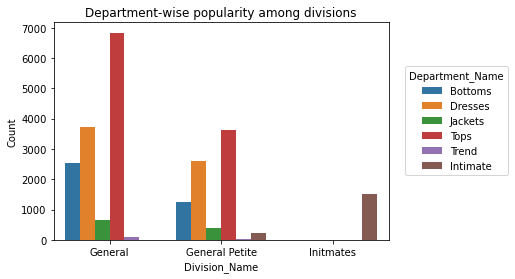

In [107]:
df_d=df1.groupby(['Division_Name','Department_Name']).size().reset_index().rename(columns={0:'Count'})
print(df_d)
sns.barplot(x='Division_Name', y="Count", hue='Department_Name',data=df_d).set(title='Department-wise popularity among divisions')
plt.legend(title='Department_Name',bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)

From the above plot the General department has most sales across the various departments under it

   Department_Name  Rating  Count   % Rating
0          Bottoms     1.0    115   3.027112
1          Bottoms     2.0    205   5.396157
2          Bottoms     3.0    421  11.081864
3          Bottoms     4.0    785  20.663332
4          Bottoms     5.0   2273  59.831535
5          Dresses     1.0    228   3.608166
6          Dresses     2.0    461   7.295458
7          Dresses     3.0    839  13.277417
8          Dresses     4.0   1393  22.044627
9          Dresses     5.0   3398  53.774331
10        Intimate     1.0     63   3.631124
11        Intimate     2.0     90   5.187320
12        Intimate     3.0    178  10.259366
13        Intimate     4.0    370  21.325648
14        Intimate     5.0   1034  59.596542
15         Jackets     1.0     49   4.748062
16         Jackets     2.0     60   5.813953
17         Jackets     3.0     91   8.817829
18         Jackets     4.0    201  19.476744
19         Jackets     5.0    631  61.143411
20            Tops     1.0    376   3.591899
21        

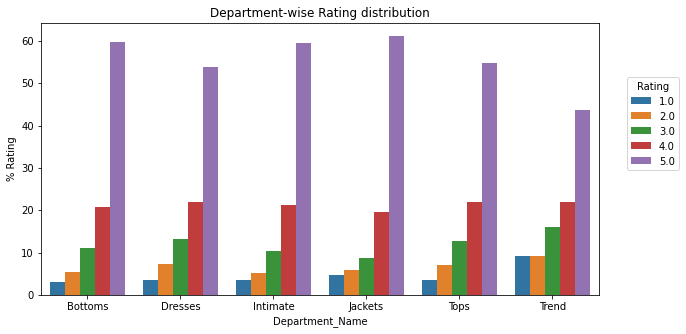

In [108]:
df_d=df1.groupby(['Department_Name','Rating']).size().reset_index().rename(columns={0:'Count'})
df_d['% Rating'] = df_d.apply(lambda row: row.Count / (df1.groupby(['Department_Name']).size()[row.Department_Name]) *100, axis=1)
print(df_d)
plt.figure(figsize=(10,5))
sns.barplot(x='Department_Name', y="% Rating", hue='Rating',data=df_d).set(title='Department-wise Rating distribution')
plt.legend(title='Rating',bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)

Across all departments the share of each rating increases with rating value and rating 5 constitutes more than 50% of all ratings. Trend department is seen to have comparitively higher % (9%) for rate 1 when compared to others(<5%) 

In [109]:
df_d=df1.groupby(['Department_Name','Age']).size().reset_index().rename(columns={0:'Count'})
df_d

,Department_Name,Age,Count
0,Bottoms,Adult,1623
1,Bottoms,Elderly,184
2,Bottoms,Middle Age,1810
3,Bottoms,Youngster,181
4,Dresses,Adult,2905
5,Dresses,Elderly,289
6,Dresses,Middle Age,2768
7,Dresses,Youngster,355
8,Intimate,Adult,857
9,Intimate,Elderly,97


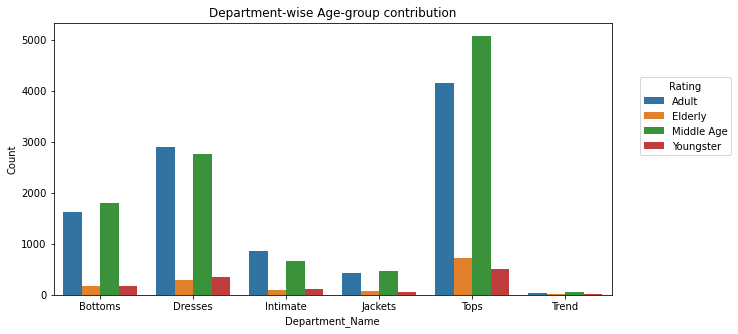

In [110]:
plt.figure(figsize=(10,5))
sns.barplot(x='Department_Name', y="Count", hue='Age',data=df_d).set(title='Department-wise Age-group contribution')
plt.legend(title='Rating',bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)

Across all departments adults and middle age have significant presence. Elderly and Youngster although much lower are almost at par

        Class_Name        Recommend  Count  % Recommendation
0          Blouses  Not Recommended    588         18.986116
1          Blouses      Recommended   2509         81.013884
2   Casual bottoms      Recommended      2        100.000000
3         Chemises      Recommended      1        100.000000
4          Dresses  Not Recommended   1212         19.180250
5          Dresses      Recommended   5107         80.819750
6       Fine gauge  Not Recommended    179         16.272727
7       Fine gauge      Recommended    921         83.727273
8        Intimates  Not Recommended     22         14.285714
9        Intimates      Recommended    132         85.714286
10         Jackets  Not Recommended    109         15.482955
11         Jackets      Recommended    595         84.517045
12           Jeans  Not Recommended    136         11.857018
13           Jeans      Recommended   1011         88.142982
14           Knits  Not Recommended    883         18.232501
15           Knits      

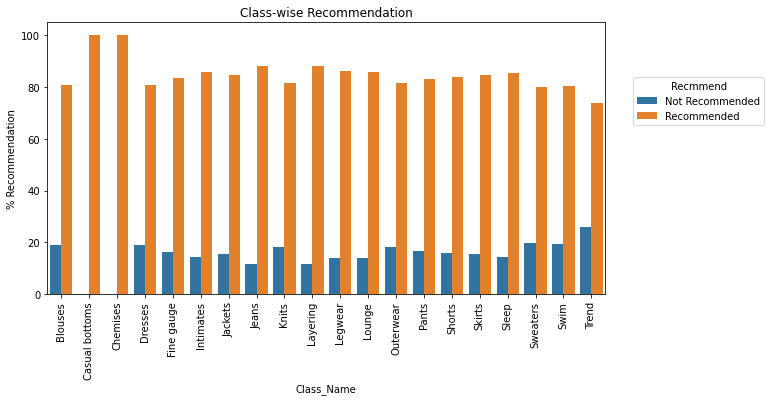

In [111]:
df_d=df1.groupby(['Class_Name','Recommend']).size().reset_index().rename(columns={0:'Count'})
df_d['% Recommendation'] = df_d.apply(lambda row: row.Count / (df1.groupby(['Class_Name']).size()[row.Class_Name]) *100, axis=1)
print(df_d)
plt.figure(figsize=(10,5))
sns.barplot(x='Class_Name', y="% Recommendation", hue='Recommend',data=df_d).set(title='Class-wise Recommendation')
plt.xticks(rotation=90)
plt.legend(title='Recmmend',bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)

Jeans is the class with highest % Recommendation where both kind of responses were recorded(Recommended/Not Recommended)

    index  Class_Name        Recommend  Count  % Recommendation
0      36       Trend  Not Recommended     31         26.050420
1      32    Sweaters  Not Recommended    285         19.957983
2      34        Swim  Not Recommended     68         19.428571
3       4     Dresses  Not Recommended   1212         19.180250
4       0     Blouses  Not Recommended    588         18.986116
5      22   Outerwear  Not Recommended     60         18.292683
6      14       Knits  Not Recommended    883         18.232501
7      24       Pants  Not Recommended    232         16.714697
8       6  Fine gauge  Not Recommended    179         16.272727
9      26      Shorts  Not Recommended     51         16.088328
10     10     Jackets  Not Recommended    109         15.482955
11     28      Skirts  Not Recommended    146         15.449735
12     30       Sleep  Not Recommended     33         14.473684
13      8   Intimates  Not Recommended     22         14.285714
14     20      Lounge  Not Recommended  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Trend'),
  Text(1, 0, 'Sweaters'),
  Text(2, 0, 'Swim'),
  Text(3, 0, 'Dresses'),
  Text(4, 0, 'Blouses'),
  Text(5, 0, 'Outerwear'),
  Text(6, 0, 'Knits'),
  Text(7, 0, 'Pants'),
  Text(8, 0, 'Fine gauge'),
  Text(9, 0, 'Shorts'),
  Text(10, 0, 'Jackets'),
  Text(11, 0, 'Skirts'),
  Text(12, 0, 'Sleep'),
  Text(13, 0, 'Intimates'),
  Text(14, 0, 'Lounge'),
  Text(15, 0, 'Legwear'),
  Text(16, 0, 'Jeans'),
  Text(17, 0, 'Layering')])

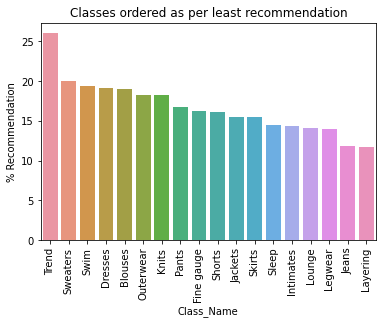

In [112]:
df_least_rec=df_d.sort_values(by=('% Recommendation'),ascending=False).loc[df_d['Recommend']=='Not Recommended'].reset_index()
print(df_least_rec)
sns.barplot(x='Class_Name', y="% Recommendation",data=df_least_rec).set(title='Classes ordered as per least recommendation')
plt.xticks(rotation=90)

Among the classes of clothing the least recommended is Trend followed by Sweaters,Swim and Dresses

### Train Test Split

In [113]:
from sklearn.model_selection import train_test_split
#Setting the features X
X=df.drop(['Recommend'],axis=1)
#Setting target y
y=df['Recommend']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.3,stratify = y) # 30% data is for testing

#checking representation from target classes in test data and train data has equal 
print("Test data\n",y_test.value_counts())
print("Train data\n",y_train.value_counts())

Test data
 1.0    5790
0.0    1252
Name: Recommend, dtype: int64
Train data
 1.0    13510
0.0     2920
Name: Recommend, dtype: int64


### Modelling and tuning

### Decision Tree Model

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print("F1_score :",f1_score(y_test,prediction))
print("Accuracy score :",accuracy_score(y_test,prediction))
print("Confusion_matrix :",confusion_matrix(y_test,prediction))

F1_score : 0.9552342797422052
Accuracy score : 0.9270093723374041
Confusion_matrix : [[1044  208]
 [ 306 5484]]


Decision tree model has f1 score of 95.5%

#### Hyperparamter tuning on Decision tree based on Grid Search

In [115]:
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)
params = {
    'max_depth': [2, 3, 5, 10, 15,20],
    'min_samples_leaf': [5, 10, 20, 25,40],
    'criterion': ["gini", "entropy"],
    'max_features':[4,5,6,7]
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt,param_grid=params,cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search.fit(X_train, y_train)
dt_best = grid_search.best_estimator_
prediction=dt_best.predict(X_test)
print("F1_score :",f1_score(y_test,prediction))
print("Accuracy score :",accuracy_score(y_test,prediction))
print("Confusion_matrix :",confusion_matrix(y_test,prediction))

Fitting 4 folds for each of 240 candidates, totalling 960 fits
F1_score : 0.9610020431731368
Accuracy score : 0.9376597557512071
Confusion_matrix : [[1194   58]
 [ 381 5409]]


After model tuning decision tree classification has f1 score of 96.1%

### Random Forest Classifier

In [116]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(random_state=42)
random_forest.fit(X_train,y_train)
y_pred=random_forest.predict(X_test)
print("Accuracy is:",round(accuracy_score(y_test,y_pred),3))
print("f1 score is:",round(f1_score(y_test,y_pred,average='micro'),2))
print("Confusion_matrix :",confusion_matrix(y_test,y_pred))

Accuracy is: 0.927
f1 score is: 0.93
Confusion_matrix : [[1023  229]
 [ 285 5505]]


Random Forest Classifier has f1 score of 93%

#### Hyperparamter tuning on Random Forest Classifier

In [117]:
random_forest=RandomForestClassifier(random_state=42,bootstrap= True,
 max_depth= 40,
 max_features= 6,
 min_samples_leaf= 25,
 n_estimators= 200)
random_forest.fit(X_train,y_train)
y_pred=random_forest.predict(X_test)
print("Accuracy is:",round(accuracy_score(y_test,y_pred),3))
print("f1 score is:",round(f1_score(y_test,y_pred,average='micro'),2))
print("Confusion_matrix :",confusion_matrix(y_test,y_pred))

Accuracy is: 0.936
f1 score is: 0.94
Confusion_matrix : [[1144  108]
 [ 345 5445]]


After tuning Random Forest Classifier has f1 score of 94%

### KNN Model

[0.9268673672252201, 0.9291394490201648, 0.9288554387957967, 0.9298494745810849, 0.9261573416642999, 0.9260153365521159, 0.926299346776484, 0.9271513774495882, 0.9245952854302755, 0.9258733314399319, 0.9260153365521159, 0.9280034081226924]


Text(0, 0.5, 'accuracy')

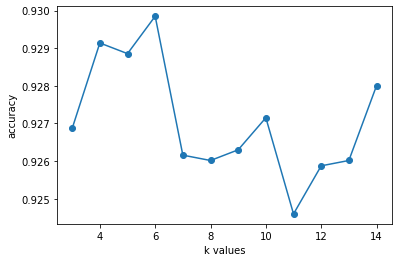

In [118]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier= KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    prediction=classifier.predict(X_test)
    acc=accuracy_score(y_test,prediction)
    acc_values.append(acc)  
print(acc_values)
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k values')
plt.ylabel('accuracy')

We can see highest accuracy is at 6 .Therefore we can take k value as 6

In [119]:
classifier= KNeighborsClassifier(n_neighbors=6,metric='minkowski')
classifier.fit(X_train,y_train)
prediction=classifier.predict(X_test)
print("F1_score :",f1_score(y_test,prediction))
print("Accuracy score :",accuracy_score(y_test,prediction))
print("Confusion_matrix :",confusion_matrix(y_test,prediction))

F1_score : 0.9570807993049522
Accuracy score : 0.9298494745810849
Confusion_matrix : [[1040  212]
 [ 282 5508]]


KNN Model has an f1 score of 95.7%

### Logistic Regression Model

In [120]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression(random_state=42,multi_class='multinomial')
logit_model.fit(X_train,y_train)
y_pred=logit_model.predict(X_test)
print("Accuracy is:",round(accuracy_score(y_test,y_pred),3))
print("f1 score is:",round(f1_score(y_test,y_pred,average='micro'),3))
print("Confusion_matrix :",confusion_matrix(y_test,y_pred))

Accuracy is: 0.931
f1 score is: 0.931
Confusion_matrix : [[1086  166]
 [ 321 5469]]


Logistic regression model has f1 score of 93.1%

### SVM Classifier

In [121]:
from sklearn.svm import SVC
svm_model=SVC(random_state=42)
svm_model.fit(X_train,y_train)
y_pred=svm_model.predict(X_test)
print("Accuracy is:",round(accuracy_score(y_test,y_pred),3))
print("f1 score is:",round(f1_score(y_test,y_pred,average='micro'),3))
print("Confusion_matrix :",confusion_matrix(y_test,y_pred))

Accuracy is: 0.935
f1 score is: 0.935
Confusion_matrix : [[1168   84]
 [ 372 5418]]


SVM classifier has f1_score of 93.5%

#### From the above models and their results we can conclude Decision Tree Classifier after hypertuning as the best model with an f1 score of 96% and accuracy of 93.7%